# Basic guide on how to use the LineageTree object 

### Load a lineageTree

In [1]:
from LineageTree import lineageTree

Load a mastodon/mamut/astec... file

In [2]:
lT = lineageTree(file_format="../test/data/test-mamut.xml", file_type="mamut")
lT.write("../test/data/test-mamut.lT")

Load a ready made lineageTree object

In [ ]:
lT = lineageTree.load("../test/data/test-mamut.lT")

Inspect all lineages

This functions returns the axes and an ax to root dictionary, so these axes can \
be used for more sophisticated plotting if needed.

Example of how lineages are plotted through plot all lineages
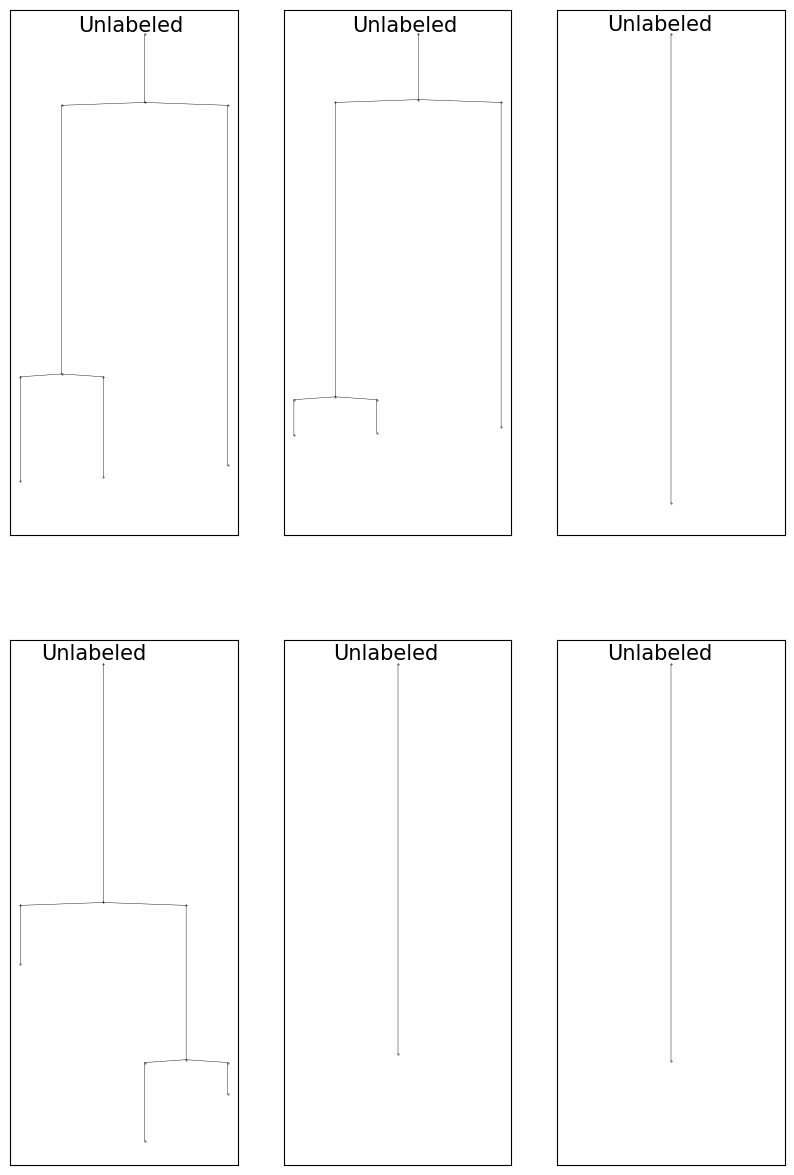

In [ ]:
lT.plot_all_lineages()

Or inspect just one

In [ ]:
lT.plot_node(list(lT.roots)[3])

Inspect all the descendants of a node

In [ ]:
selected_root = list(lT.roots)[0]
lT.get_sub_tree(selected_root)  # returns all the nodes spawned by a node
lT.get_all_tracks()  # returns a list of lists that contains each branch of the dataset
lT.get_all_branches_of_node(
    selected_root
)  # returns a list of lists that contains each branch of the subtree of a node

In [ ]:
lT.nodes  # all the nodes present on the lT object
lT.roots  # all the roots of the object
lT.successor  # dictionary that connects an id to a list of successors, can be used to find all edges.

Modify the object

In [ ]:
lT.modify_branch(
    node=selected_root, new_length=100
)  # modifies the length of a branch
lT.add_branch(selected_root, length=30)  # adds a branch on the specified node
lT.remove_nodes(
    lT.get_sub_tree(selected_root)[50:]
)  # removes a set/list of nodes, or a single node
lT.complete_lineage()  # Completes the lineage by making each leaf to have the last node on self.t_e
lT.plot_all_lineages()

### Making comparisons

For comparing trees we use an unordered tree edit distance algorithm created by Zhang & Shasha 1989 (Simple Fast Algorithms for the Editing Distance Between Trees and Related Problems) and implemented by Paassen (https://gitlab.ub.uni-bielefeld.de/bpaassen/python-edit-distances)

One to one

In [ ]:
selected_root_1 = list(lT.roots)[1]
selected_root_2 = list(lT.roots)[2]

lT.unordered_tree_edit_distance(
    selected_root_1, selected_root_2, style="fragmented"
)

There are several styles that can be used, according to the needs of the analysis:

> 1. **mini**, each branch of the tree is considered of length one, so details of the tree are not being taken into account.
> 2. **simple**, each branch is the same length as it should be, however it is considered as one node with length the same as the length of its cycle. This method is better than mini tree, but suffers for trees that the divisions don't happen simoultaneously.
> 3. **fragmented**, similar to simple but was created to fix this specific problem, instead of using just one node for the length, it adds nodes on the edges of each branch of specified length. This way it has comparable speed to simple but far more accurate results.
> 4. **full**, the most accurate method as it uses all the nodes of the tree as they are, but can be slow and consumes much more RAM.


All nodes from a timepoint

In [ ]:
lT.unordered_tree_edit_distances_at_time_t(10)

 Calculating all distances on a timepoint can be used to create heatmaps/clustermaps for easier inspection of symmetrical lineages, an example of such a usage is on the notebook Easy_clustermaps.ipynb

Add them to the manager

In [1]:
from LineageTree import lineageTreeManager

In [ ]:
lTm = lineageTreeManager()
lTm.add(lT)